In [1]:
import sys
sys.path.append("../simcmb/")
sys.path.append("../simcmb/settings/")

In [2]:
import camb_ps_maker as cpm
import yam_in as yi
import clplotting

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
Yd0 = yi.Ydict("../simcmb/settings/planck_2018_1e4.yaml")
PM0 = cpm.PS_Maker(Yd0)

In [4]:
cl0 = PM0.get_cls(PM0.Ydict.pars)

from 15:35:58.927332 P to 15:36:00.344055 P or 1.416723 seconds total


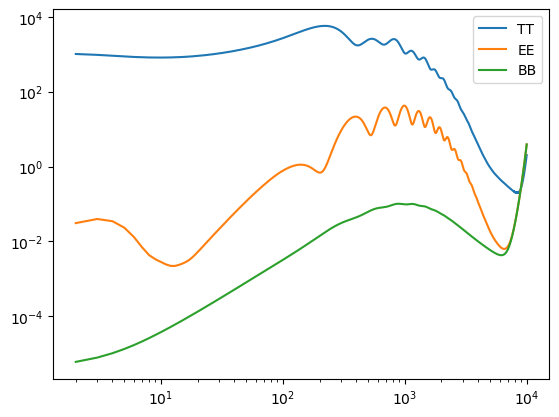

In [5]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT')
plt.plot(cl0['l'][2:], cl0['clEE'][2:], label='EE')
plt.plot(cl0['l'][2:], cl0['clBB'][2:], label='BB')
plt.loglog()
plt.legend()
plt.show()

In [6]:
PM0.update_vals('noise_level', 8, incamb=False)

In [7]:
cl1 = PM0.get_cls(PM0.Ydict.pars)

from 15:36:02.148414 P to 15:36:03.514734 P or 1.366320 seconds total


In [8]:
PM0.update_vals('beam_fwhm', 6, incamb=False)

In [9]:
cl2 = PM0.get_cls(PM0.Ydict.pars)

from 15:36:04.625395 P to 15:36:05.817721 P or 1.192326 seconds total


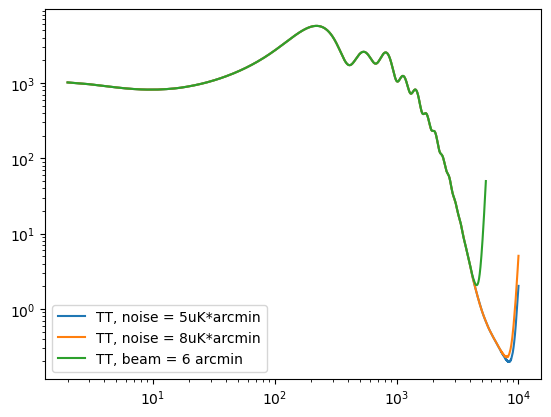

In [10]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT, noise = 5uK*arcmin')
plt.plot(cl1['l'][2:], cl1['clTT'][2:], label='TT, noise = 8uK*arcmin')
plt.plot(cl2['l'][2:], cl2['clTT'][2:], label='TT, beam = 6 arcmin')
plt.loglog()
plt.legend()
plt.show()

In [11]:
f1 = clplotting.flatmap(192, 5, cl_dict=cl0)

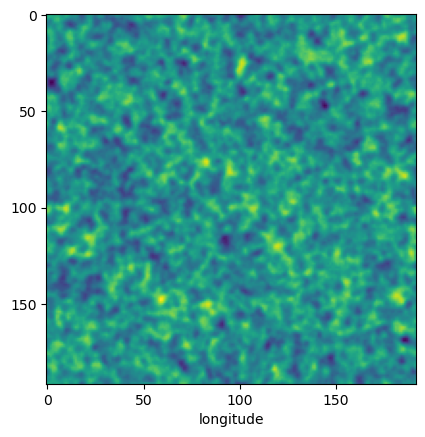

In [12]:
plt.imshow(f1.flatmap('T', seed = 0)[0])
plt.xlabel("longitude")
plt.xticks(range(0,200,50))
plt.yticks(range(0,200,50))
plt.show()

In [13]:
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]), np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(-5.820766091346741e-10, -1602.4520239122212)

In [14]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [15]:
f1.flatmap('TQU').shape

(3, 192, 192)